BANK LOAN REPAYMENT APPROVALS WITH CLASSIFICATION ALGORITHMS

This project aims to predict bank loan repayment. We are going to firstly perform an EDA and then use classification algorithms and . these models will be evaluated with performance metrics. We will Finally we will choose the best model and set a data visualization application with Sreamlit to provide interactive insights. Here we breakdown the classification algorithms and the performance metrics.
Models :
- Logistic Regression
- Random Forest
- XGBoost

Performance metrics:
- Logistic Regression : confusion matrix, precision, recall, F1 score, ROC curve
- Random Forest & XGBoost : confusion matrix, precision, recall, F1 score, PR-AUC curve
- We're dealing with the repayment of a bank loan, so it's important for the model to be able to detect candidates who won't actually repay the loan (Precision) and also recognize those who will be able to repay among those who can (Recall). We consider a model to be good when it achieves an F1 score of at least 80%. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, precision_recall_curve
)

1. Preprocessing

In [2]:
#Data importation
data = pd.read_csv('loan_data.csv')
data.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
#Dataset structure and missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
print('Missing data in each column:')
print(data.isnull().sum())

# Checking unique values for categorical variables to ensure proper data types
categorical_vars = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
for col in categorical_vars:
    print(f"Unique values in {col}: {data[col].unique()}")

Missing data in each column:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64
Unique values in person_gender: ['female' 'male']
Unique values in person_education: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
Unique values in person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Unique values in loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Unique values in previous_loan_defaults_on_file: ['No' 'Yes']


2. Exploratory Data Analysis

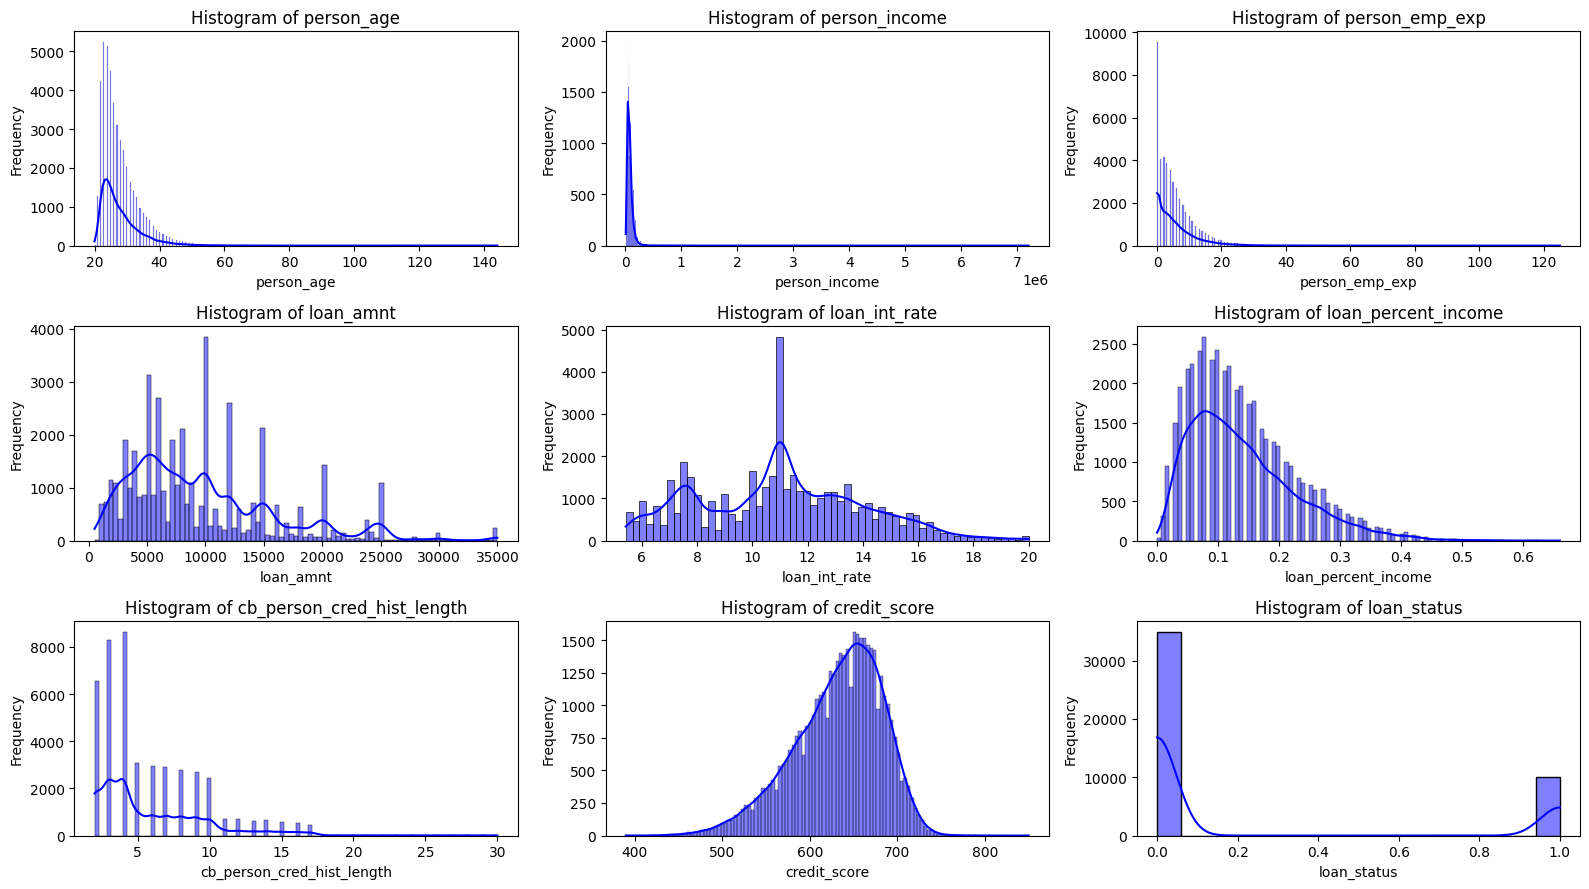

In [5]:
#Histograms for numeric variables
numeric_vars = data.select_dtypes(include=['number']).columns.tolist()
plt.figure(figsize=(16,9))
for i,j in enumerate(numeric_vars):
    plt.subplot(3,3,i+1)
    sns.histplot(data[j], kde= True, color='blue')
    plt.title(f'Histogram of {j}')
    plt.xlabel(j)
    plt.ylabel('Frequency')
    plt.tight_layout()
plt.subplots_adjust()
plt.show()

#person_age: skewness is present in data toward right which means minority people have age approximately lies between 28 to 60. Majority of people have age approximately lies between 22 to 33.

#person_income: people incomes are under 100,000 and income is normally distributed between 0.01 and 0.1.

#person_emp_exp: most of people have employment history under 5 years and it's decreasing.

#loan: 10,000 is the most borrowed amount and most of people borrow amount between 5k and 15k. 11 is the most loan interest rate given. Skewness is present in loan_percent_income toward right which means minority people have loan percent income approximately lies between 0.3 to 0.6. Majority of people have loan percent income approximately lies between 0.05 to 0.2

#credit score is almost normally distributed between 500 and 740. 

#Loan status: classes are unbalanced.

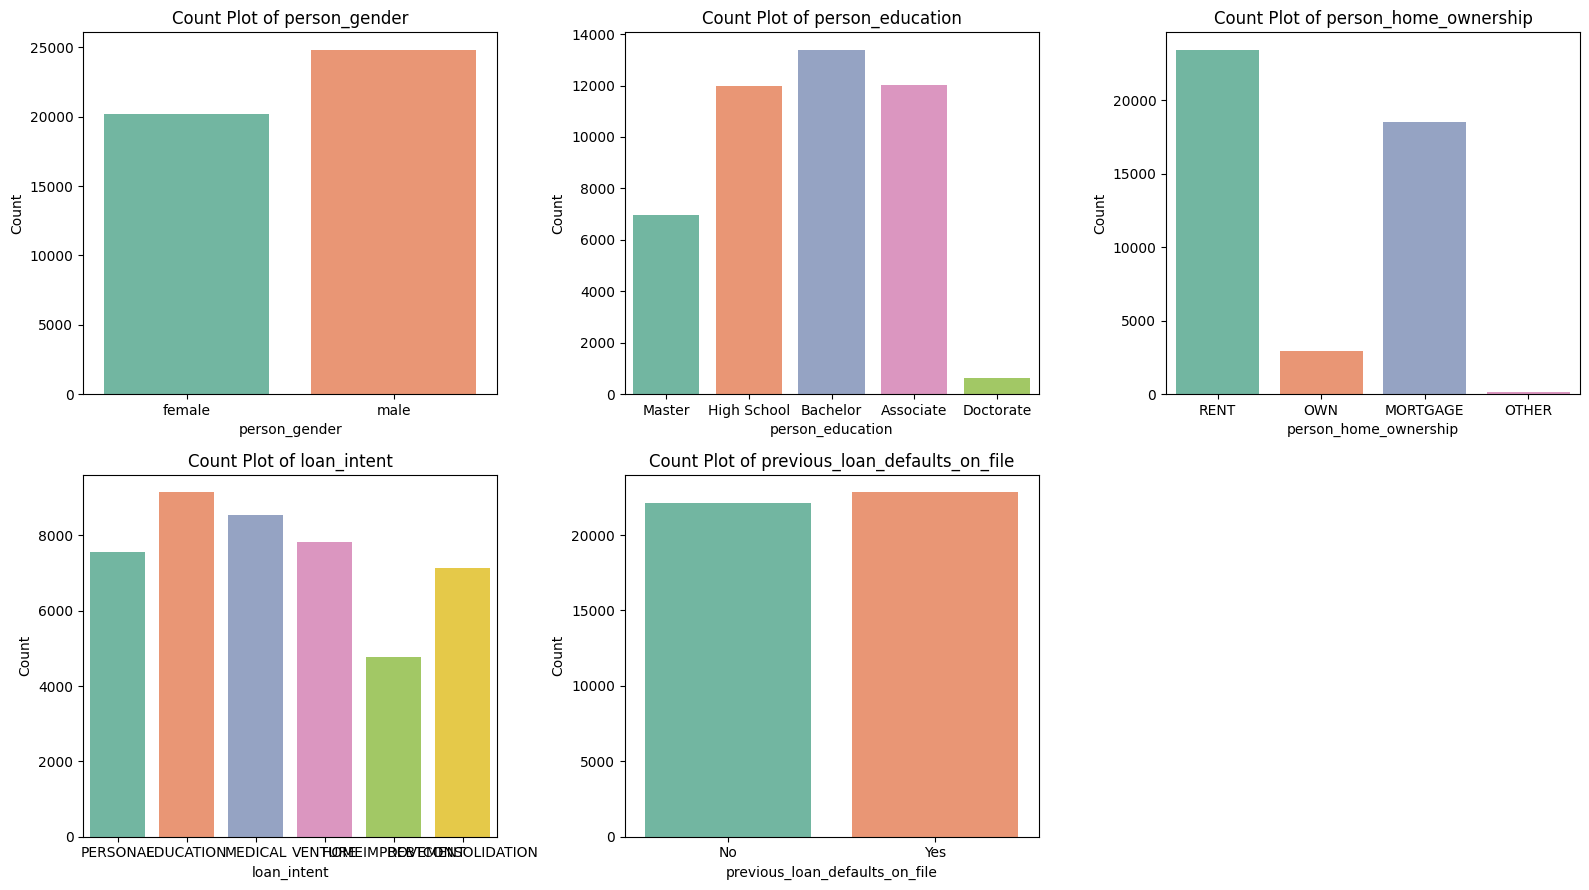

In [6]:
#count plots for categorical variables
plt.figure(figsize=(16,9))
for i,j in enumerate(categorical_vars):
    plt.subplot(2,3,i+1)
    sns.countplot(data = data, x=j, hue=j, palette='Set2', legend=False)
    plt.title(f'Count Plot of {j}')
    plt.xlabel(j)
    plt.ylabel('Count')
    plt.tight_layout()
plt.subplots_adjust()
plt.show()

Most of loan candidates are male, have education level between High school and Bachelor, are renting for home and have intention to use the loan for education, medical purposes or investment. We can say that most of candidate are student or recent graduates seeking for higher education or financial investment. 

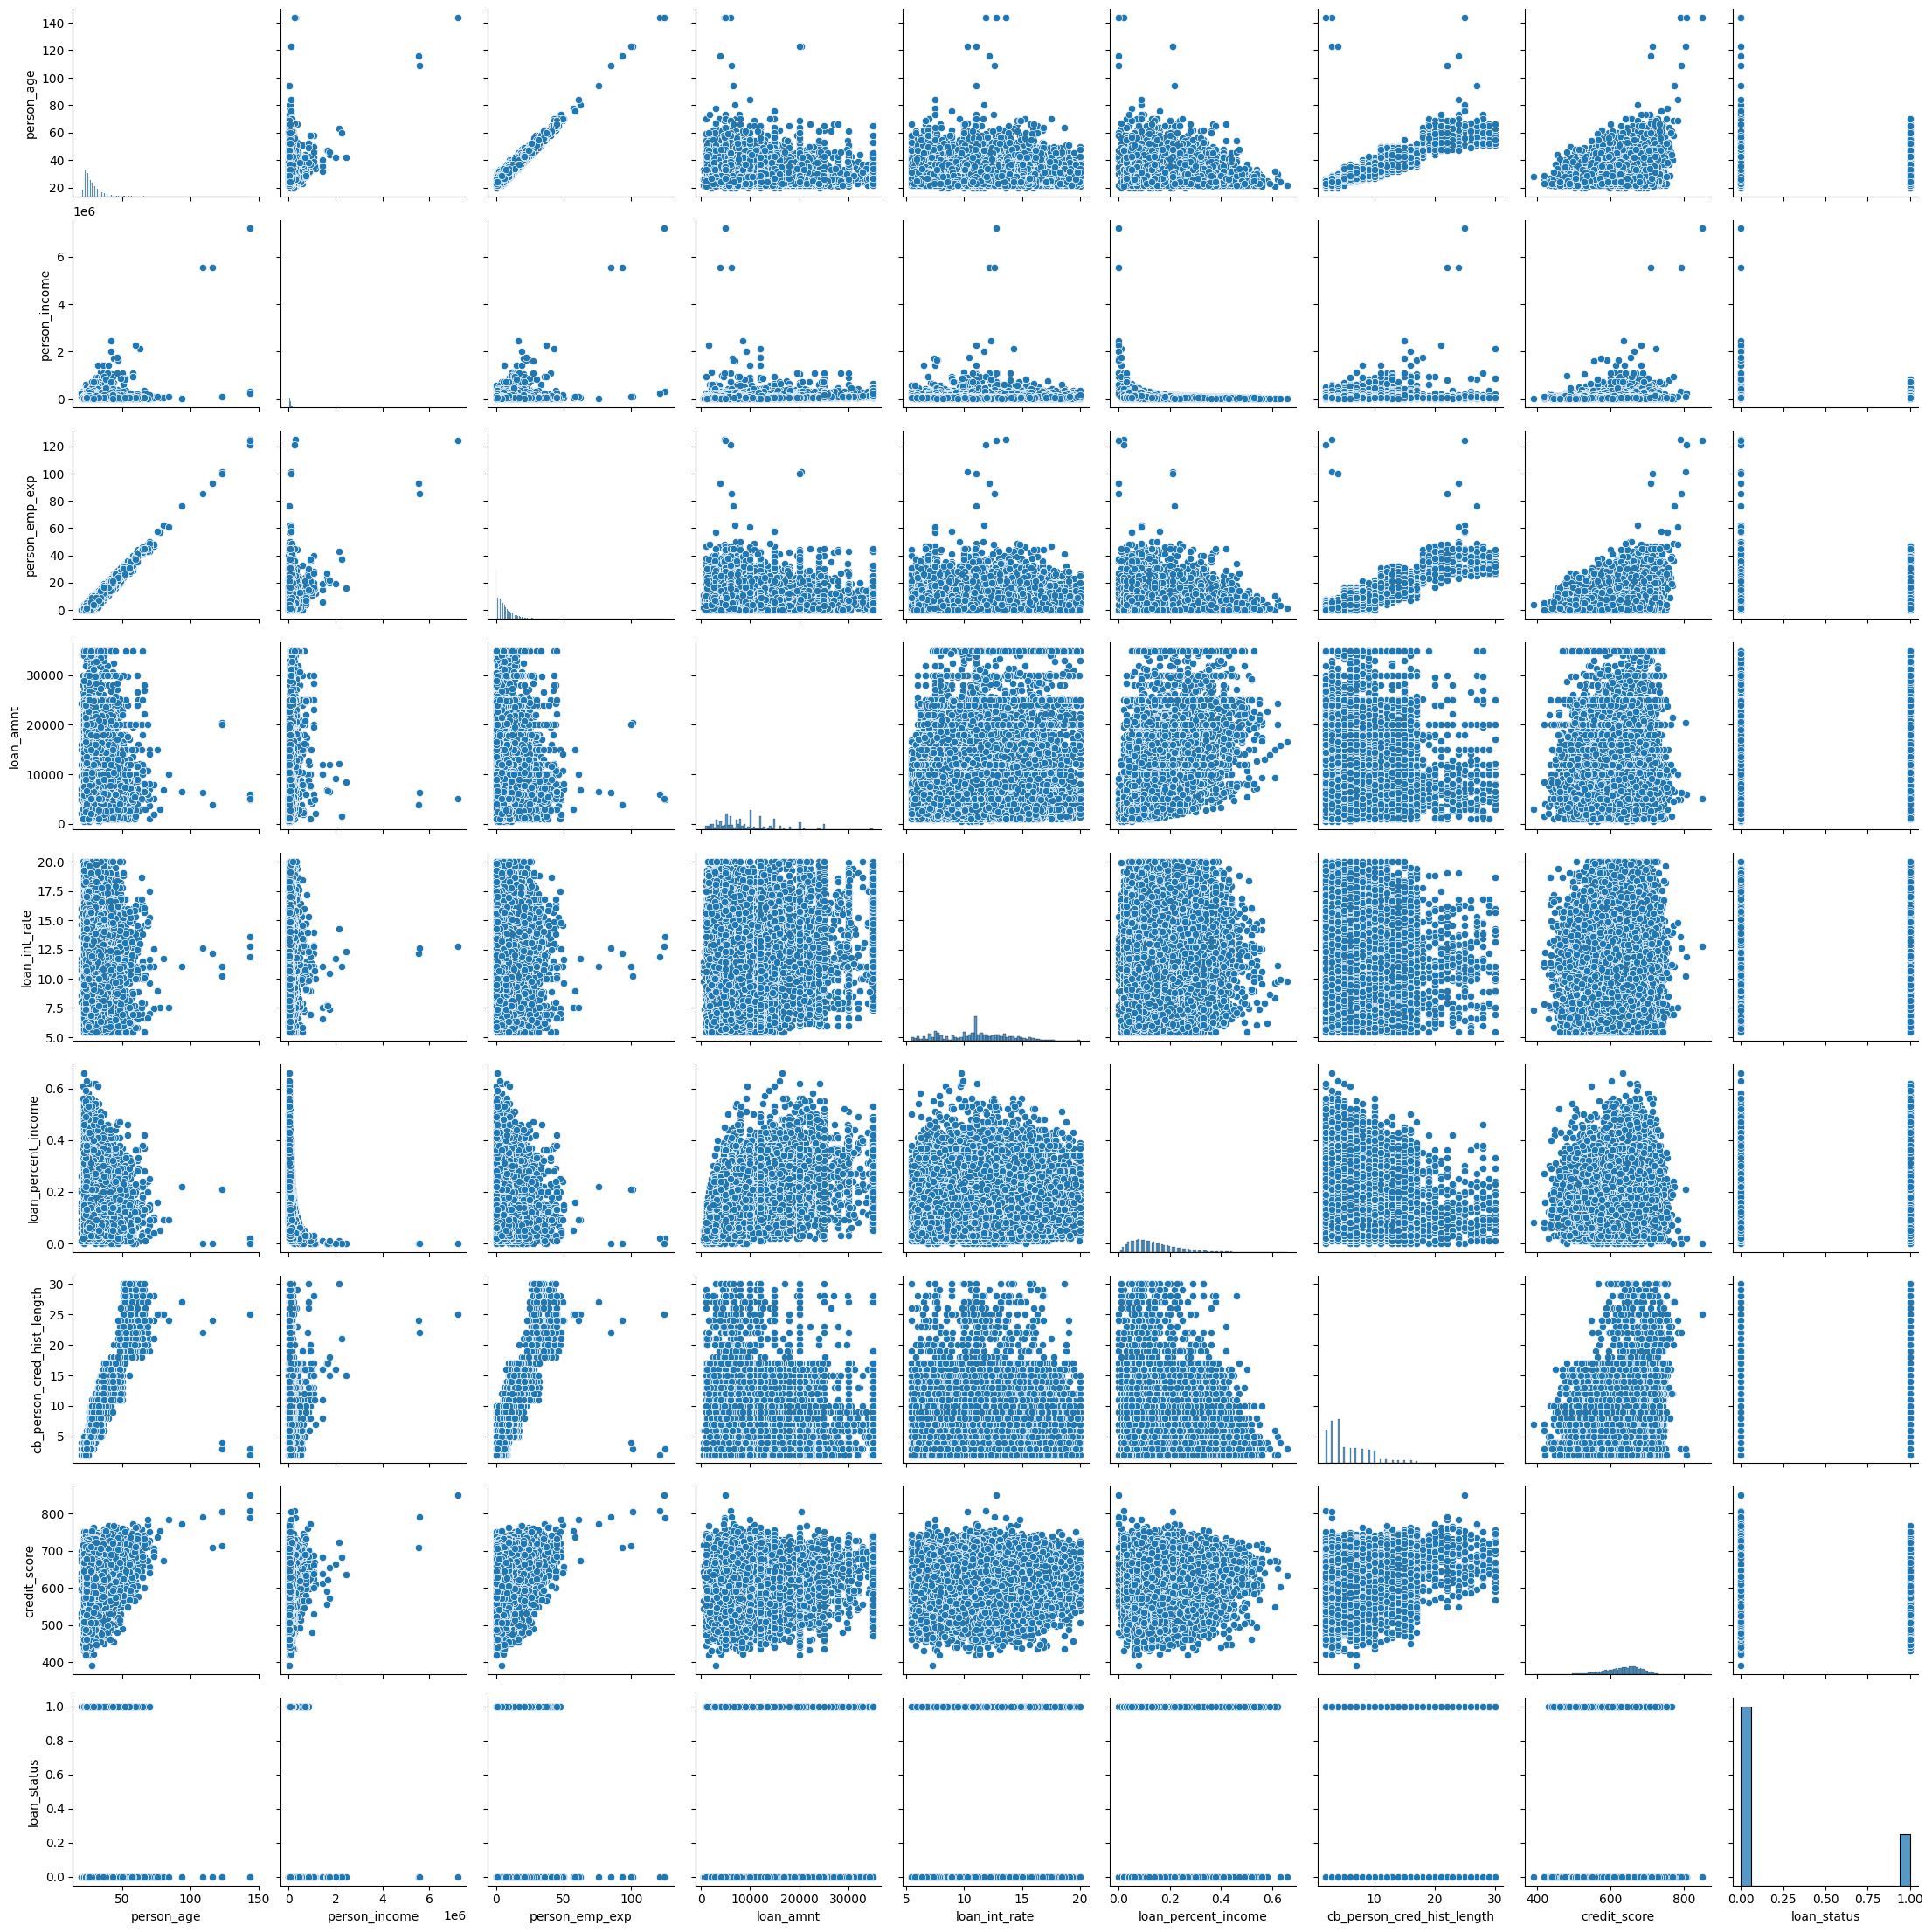

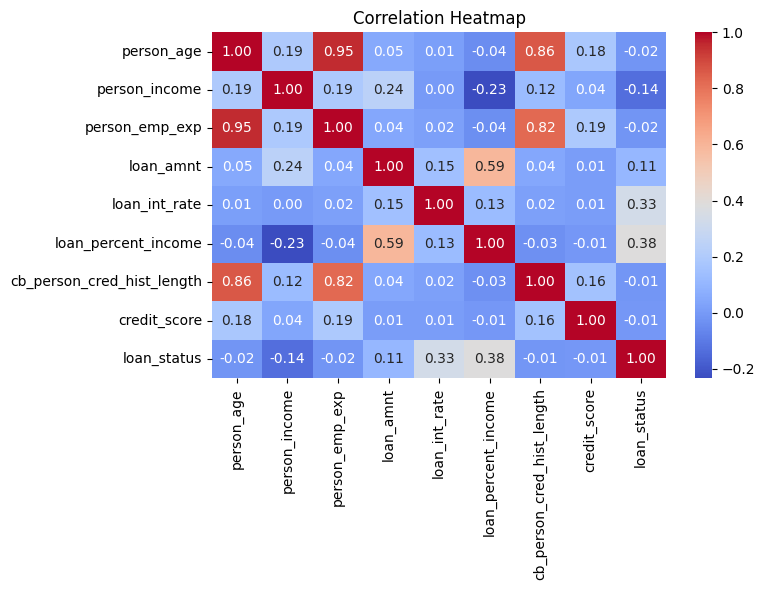

In [7]:
#Pair plot of numerical variables
sns.pairplot(data[numeric_vars], kind='scatter')
plt.show()

#Heatmap correlation 
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

From the EDA, we see that there is correlation between age with employment experience and age with credit history length. There is also a correlation between employment experience and credit history length. These correlation are logical and not surprising.

3. Modelization (Logistic regression, Random Forest, XGBoost) 


--- Logistic Regression Metrics ---
Accuracy : 0.8941481481481481
Precision: 0.7702054794520548
Recall: 0.7479215164615897
F1 score: 0.7588999493841742


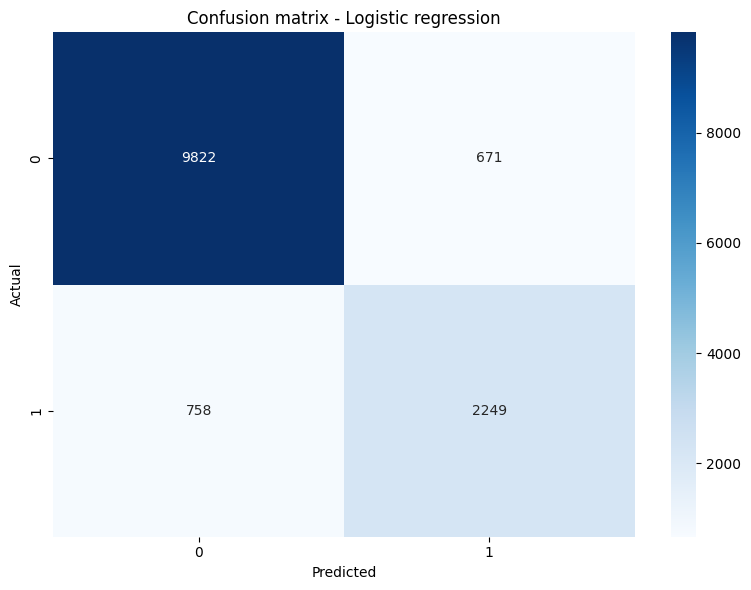

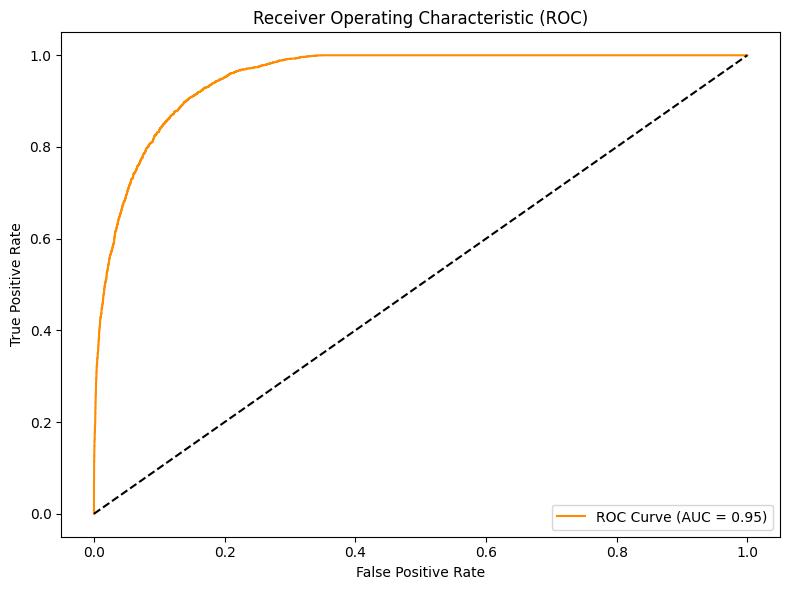

In [8]:
#Logistic Regression
#Create dummy variables for categorical variables
data_encoded1 = pd.get_dummies( data, columns= ['person_gender', 'person_education', 'loan_intent', 'previous_loan_defaults_on_file'], drop_first= True ) 
data_encoded2 = pd.get_dummies( data_encoded1, columns= ['person_home_ownership'], drop_first=False) 
data_encoded = data_encoded2.drop(columns=['person_home_ownership_OTHER'], axis=1) #We want to keep the classes Mortgage, Own and Rent of this variable

#Division of features (X) and targeted variable (y)
X = data_encoded.drop(['loan_status'], axis=1)
y = data_encoded['loan_status']

#Split the data into train and test sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

#Scaling datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Model training
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled,y_train)

#Prediction
lr_pred = lr.predict(X_test_scaled)

#Metrics
print("\n--- Logistic Regression Metrics ---")
print('Accuracy :',  accuracy_score(y_test, lr_pred))
print('Precision:',  precision_score(y_test, lr_pred))
print('Recall:',  recall_score(y_test, lr_pred))
print('F1 score:',  f1_score(y_test, lr_pred))

#Confusion matrix
lr_confusion = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(8,6))
sns.heatmap(lr_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix - Logistic regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

#ROC curve
lr_pred_probs = lr.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, lr_pred_probs)
lr_roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {lr_roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


--- Random Forest Metrics ---
Precision: 0.891640866873065
Recall: 0.766212171599601
F1 Score: 0.8241817206224289


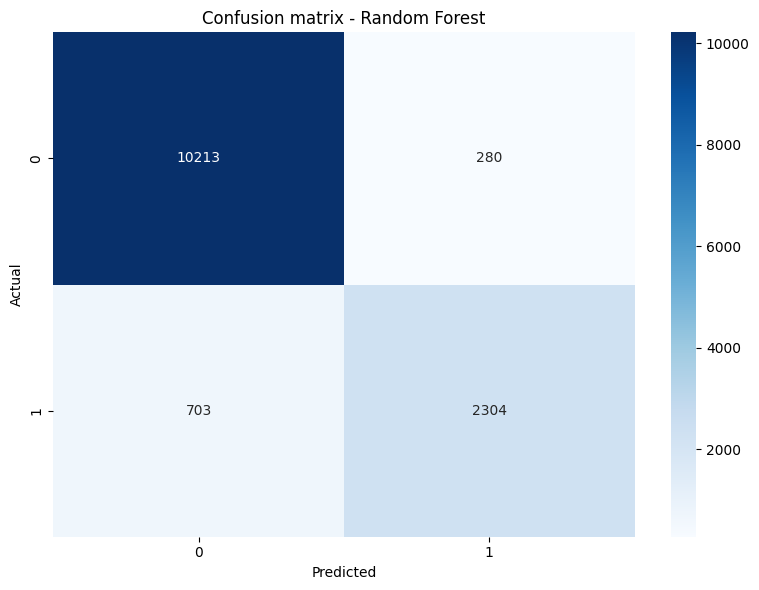

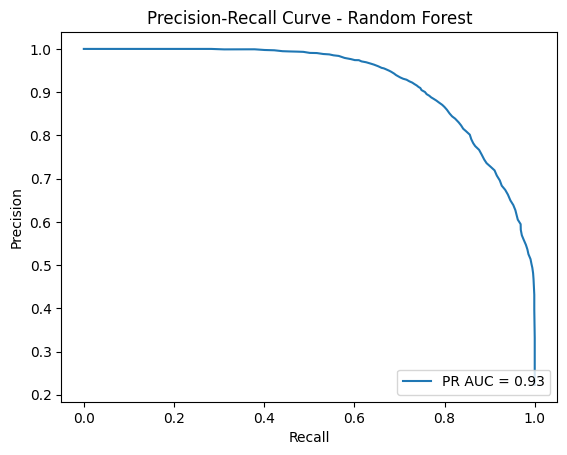

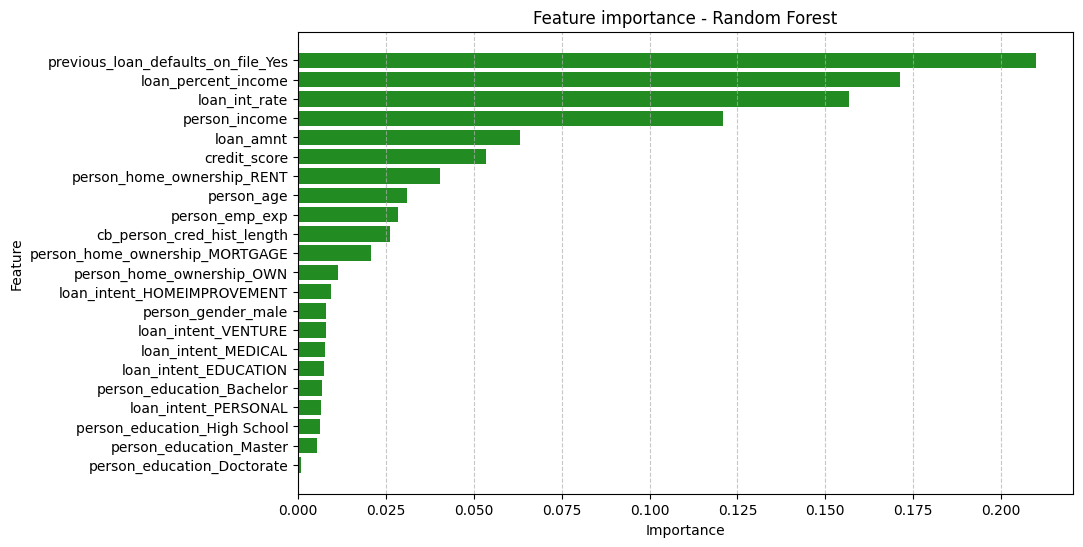

In [9]:
#Random Forest

#Model training
rf = RandomForestClassifier(n_estimators= 100, random_state=42)
rf.fit(X_train, y_train)

#Prediction
rf_pred = rf.predict(X_test)

#Metrics
print("\n--- Random Forest Metrics ---")
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))

#Confusion matrix
rf_confusion = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8,6))
sns.heatmap(rf_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


# PR Curve
rf_pred_prob = rf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, rf_pred_prob)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()


#Importance of features
feature_importance = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='forestgreen')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature importance - Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

c:\Users\SAWADOGO\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:07:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost Metrics ---
Precision: 0.8775362318840579
Recall: 0.8054539408047888
F1 Score: 0.8399514478931853


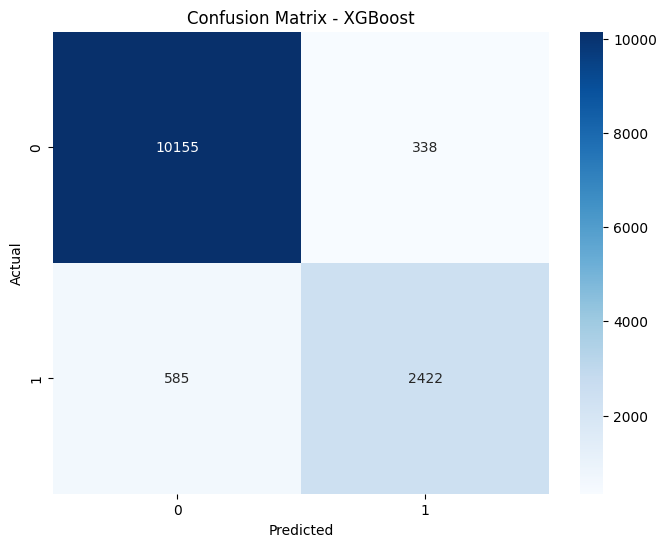

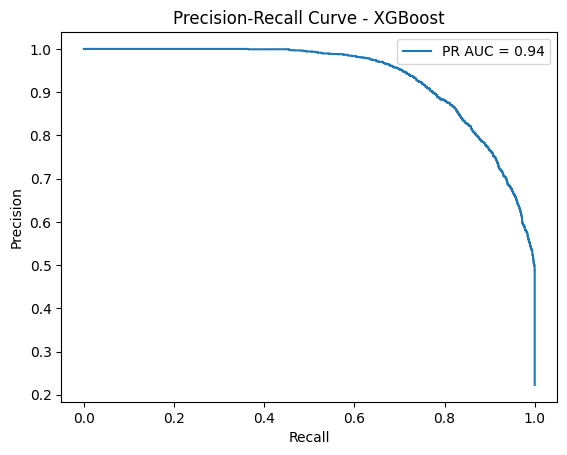

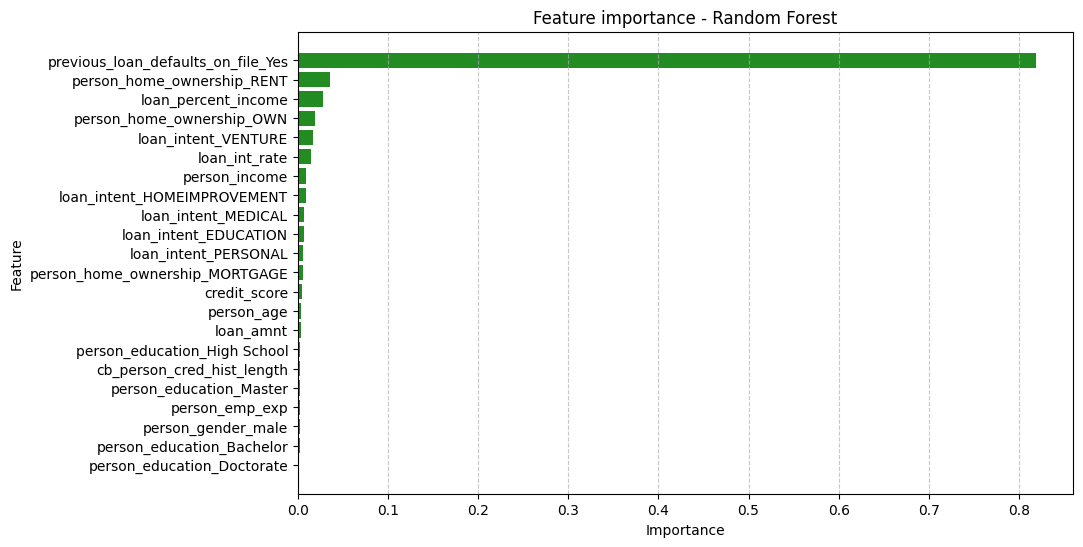

In [10]:
#XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print("\n--- XGBoost Metrics ---")
print("Precision:", precision_score(y_test, xgb_pred))
print("Recall:", recall_score(y_test, xgb_pred))
print("F1 Score:", f1_score(y_test, xgb_pred))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# PR Curve
xgb_pred_prob = xgb.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, xgb_pred_prob)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - XGBoost")
plt.legend()
plt.show()

#Importance of features
feature_importance = xgb.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='forestgreen')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature importance - Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Performance metrics show that the F1 logistic regression score is less than 80%. This is below our target. 
Random Forest and XGBoost are the models here. The F1 score is higher for XGBoost. However, Random Forest shows better Precision, while XGBoost gives us better Recall. The confusion matrix confirms that XGBoost is better at recognizing false positives, i.e. those who actually pay out among those who can; and Random Forest is better at detecting true negatives, i.e. those who won't actually be able to pay out. The two PR-AUCs are more or less the same. The final choice of model will therefore depend on the user's objective: accuracy and safety with Random Forest, seizing the opportunity to win new customers with XGBoost. Next we will see if our models can generalize.

F1 Train - RF: 1.0
F1 Test - RF: 0.8241817206224289
F1 Train - XGBoost: 0.934935826099859
F1 Test - XGBoost: 0.8399514478931853


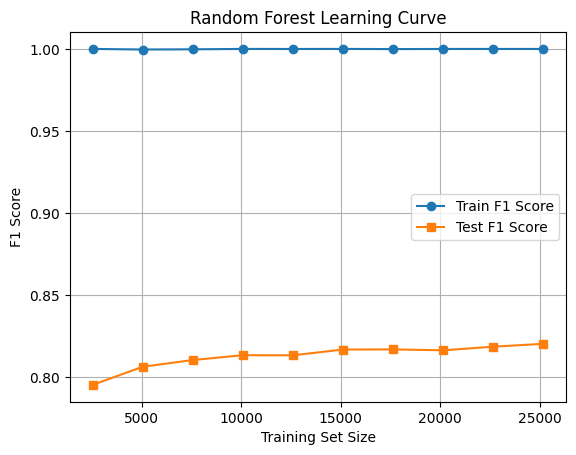

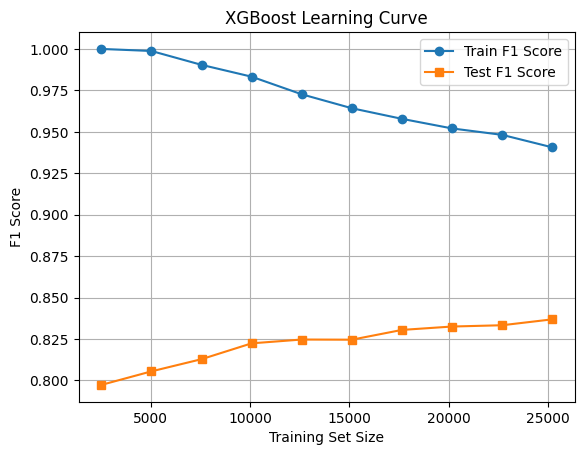

In [11]:
#We can try to improve models by comparing train and test error

#Random forest train and test error (test error is already been calculated above)
rf_pred_train = rf.predict(X_train)
print("F1 Train - RF:", f1_score(y_train, rf_pred_train))
print("F1 Test - RF:", f1_score(y_test, rf_pred))

#XGBoost train and test error (test error is already been calculated above)
xgb_pred_train = xgb.predict(X_train)
print("F1 Train - XGBoost:", f1_score(y_train, xgb_pred_train))
print("F1 Test - XGBoost:", f1_score(y_test, xgb_pred))


#Learning curves
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer

def plot_learning_curve(estimator, X, y, title):
    scorer = make_scorer(f1_score)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=estimator,
        X=X,
        y=y,
        cv=5,
        scoring=scorer,
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )
    
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, label="Train F1 Score", marker='o')
    plt.plot(train_sizes, test_mean, label="Test F1 Score", marker='s')
    plt.xlabel("Training Set Size")
    plt.ylabel("F1 Score")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_learning_curve(rf, X_train, y_train, "Random Forest Learning Curve")
plot_learning_curve(xgb, X_train, y_train, "XGBoost Learning Curve")

The Random Forest model probably overfits. The score is perfect on training data but its performance decreases on the test data, which means it doesn't generalize perfectly. 

The XGBoost model learns well without overfiting. There is less discrepancy between the train and the test, showing a better ability to generalize. In practice, this is the model to use here, as it is more robust.

Here we will choose Random Forest only the visualization purpose. In the Random Forest models there are more important features and it will need these features for data entries. 
In our Random Forest model, we can see around 12 important features, we will perform another Random Forest model with only these features for our application.

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status', 'previous_loan_defaults_on_file_Yes',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OWN',
       'person_home_ownership_RENT'],
      dtype='object')

--- Second Random Forest Metrics ---
Precision: 0.8633797515995484
Recall: 0.7628865979381443
F1 Score: 0.8100282485875706


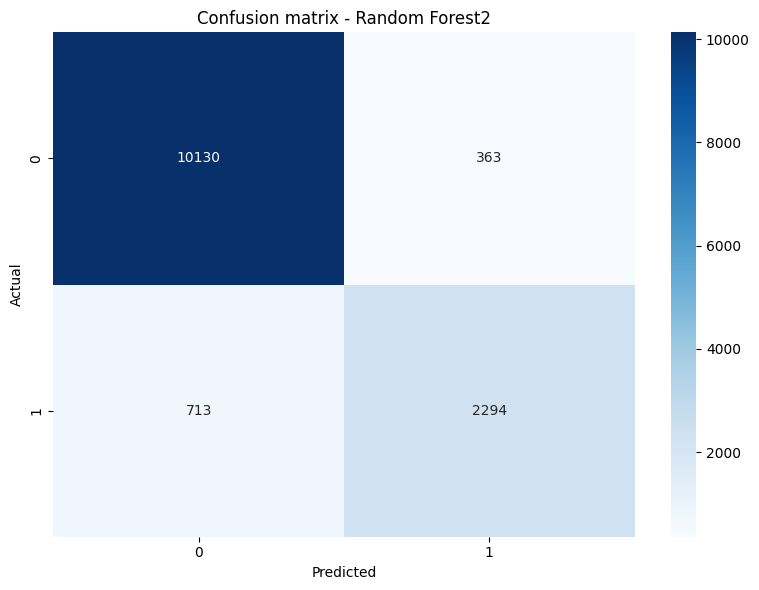

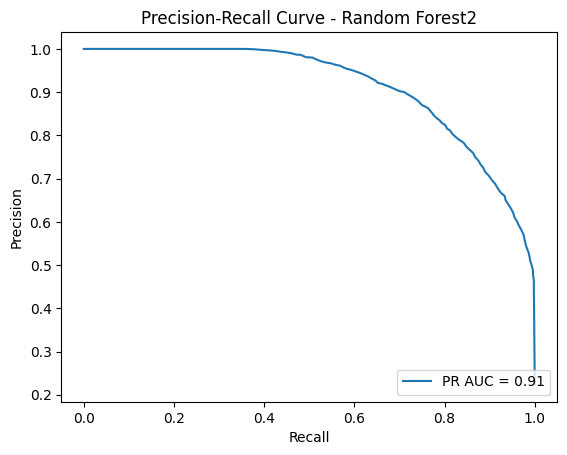

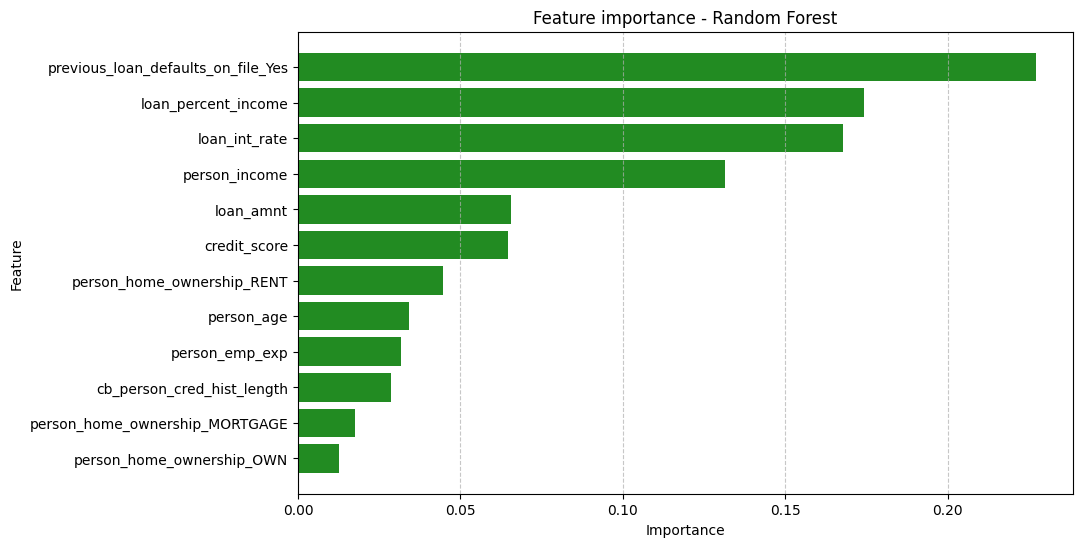

In [12]:
#Second Random Forest
#Dataset with the important features
important_features = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length','credit_score', 'loan_status', 
'previous_loan_defaults_on_file_Yes', 'person_home_ownership_MORTGAGE',
'person_home_ownership_OWN', 'person_home_ownership_RENT']
new_data= data_encoded[important_features]
print(new_data.columns)

#Division of features (A) and targeted variable (b)
A = new_data.drop(['loan_status'], axis=1)
b = new_data['loan_status']

#Split the data into train and test sets (70/30)
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size= 0.3, random_state=42)

rf2 = RandomForestClassifier(n_estimators= 100, random_state=42)
rf2.fit(A_train, b_train)

#Prediction
rf2_pred = rf2.predict(A_test)

#Metrics
print("\n--- Second Random Forest Metrics ---")
print("Precision:", precision_score(b_test, rf2_pred))
print("Recall:", recall_score(b_test, rf2_pred))
print("F1 Score:", f1_score(b_test, rf2_pred))


#Confusion matrix
rf2_confusion = confusion_matrix(b_test, rf2_pred)
plt.figure(figsize=(8,6))
sns.heatmap(rf2_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix - Random Forest2')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


# PR Curve
rf2_pred_prob = rf2.predict_proba(A_test)[:, 1]
precision, recall, _ = precision_recall_curve(b_test, rf2_pred_prob)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest2")
plt.legend(loc="lower right")
plt.show()

#Importance of features
feature_importance = rf2.feature_importances_
importance_df = pd.DataFrame({'Feature': A_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='forestgreen')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature importance - Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

4. Creation of an interactive application 

In [13]:
#Model storage
import joblib 
joblib.dump(rf2, "loanRF_model.pkl")

['loanRF_model.pkl']

In [14]:
print(new_data.columns)
print(new_data.describe())

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status', 'previous_loan_defaults_on_file_Yes',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OWN',
       'person_home_ownership_RENT'],
      dtype='object')
         person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_